# High-level database analysis for Cultural Comparison

In [1]:
%load_ext autoreload
%autoreload
import soundscapy.ssid.database as isd
from soundscapy.ssid import plotting
import pandas as pd
import janitor

# Load in the full SSID dataset
ssid = pd.read_excel("/Users/amitchell/OneDrive - The Alan Turing Institute/SSID/2021-11-24_SSID Data for Mercede.xlsx", header=0)
ssid = isd.SurveyFrame(ssid)
# Remove Lockdown recordings
ssid = ssid.filter_lockdown(is_lockdown=False)
# Filter for the locations we want
uk_locs = ['RegentsParkJapan', 'RegentsParkFields', 'RussellSq']
nl_locs = ['Noorderplantsoen']
data = ssid.filter_location_ids(uk_locs + nl_locs).encode_categorical(column_names="Gender")
data = data.add_complex_paqs()
data['Country'] = 'UK'
data.loc[data['LocationID'] == nl_locs[0], 'Country'] = 'NL'
data.describe()

ModuleNotFoundError: No module named 'soundscapy'

## Comparing the demographics of the UK and NL

### UK Data:

In [2]:
data.filter_location_ids(uk_locs)[['Age', 'Gender', 'edu00', 'eth00']].describe(include='all')


,Age,Gender,edu00,eth00
count,352.000000,357,359.000000,359.000000
unique,NaN,3,NaN,NaN
top,NaN,Female,NaN,NaN
freq,NaN,202,NaN,NaN
mean,35.906250,NaN,4.955432,1.665738
std,15.917335,NaN,1.664019,1.345267
min,18.000000,NaN,1.000000,1.000000
25%,24.750000,NaN,4.000000,1.000000
50%,30.000000,NaN,5.000000,1.000000
75%,43.000000,NaN,7.000000,2.000000


In [3]:
data.filter_location_ids(uk_locs)['Gender'].value_counts()

Female          202
Male            151
RatherNotSay      4
Name: Gender, dtype: int64

### NL Data:

In [4]:
data.filter_location_ids(nl_locs)[['Age', 'Gender', 'edu00', 'eth00']].describe(include='all')

,Age,Gender,edu00,eth00
count,8.000000,8,8.00000,8.00000
unique,NaN,2,NaN,NaN
top,NaN,Female,NaN,NaN
freq,NaN,4,NaN,NaN
mean,25.375000,NaN,3.62500,2.87500
std,5.208167,NaN,2.13391,2.10017
min,20.000000,NaN,2.00000,1.00000
25%,22.000000,NaN,2.00000,1.00000
50%,25.000000,NaN,3.00000,2.00000
75%,25.500000,NaN,4.00000,5.00000


In [5]:
data.filter_location_ids(nl_locs)['Gender'].value_counts()

Female          4
Male            4
RatherNotSay    0
Name: Gender, dtype: int64

## Relationship between sound source and the soundscape pleasantness and eventfulness


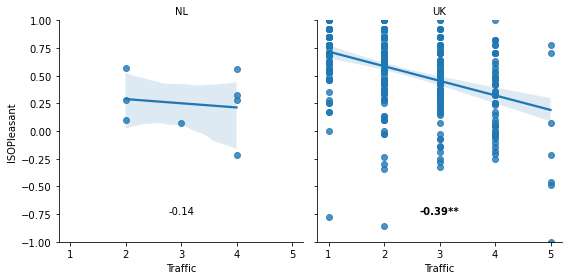

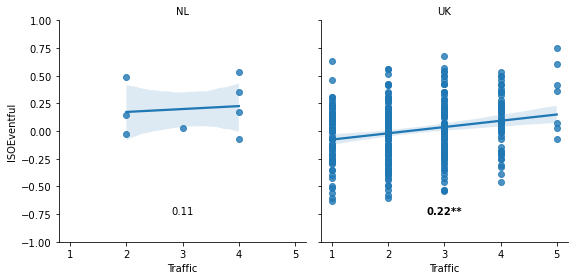

In [14]:
%autoreload
from soundscapy.ssid import plotting
plotting.grouped_lmplot(data, 'Traffic', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'Traffic', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

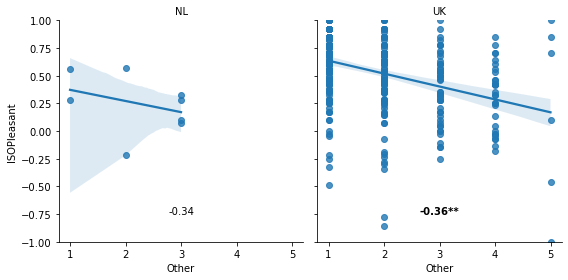

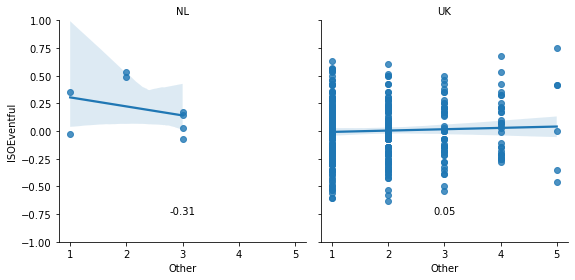

In [17]:
plotting.grouped_lmplot(data, 'Other', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'Other', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

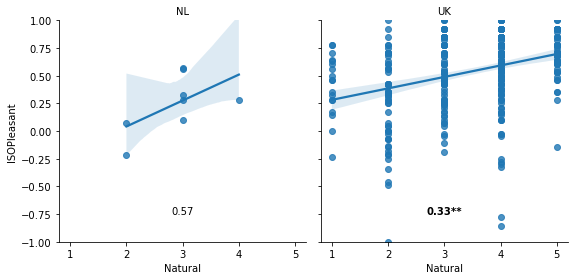

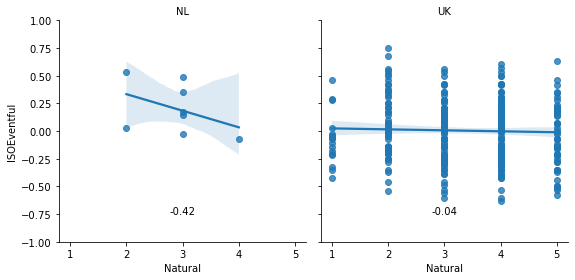

In [15]:
plotting.grouped_lmplot(data, 'Natural', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'Natural', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

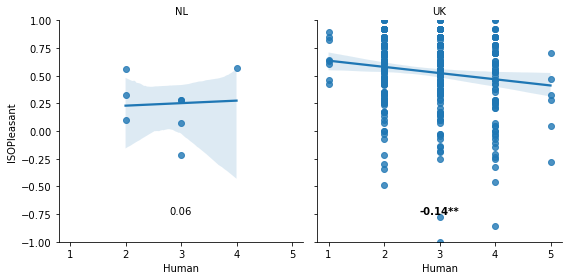

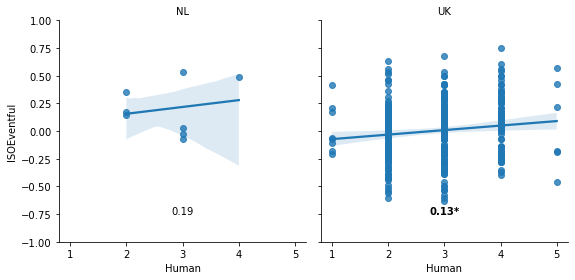

In [16]:
plotting.grouped_lmplot(data, 'Human', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'Human', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

## Relationship between L10 and L90 and the soundscape pleasantness and eventfulness

/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


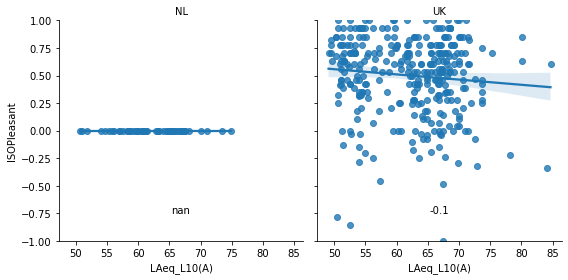

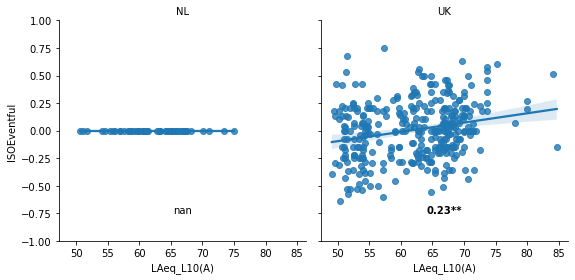

In [19]:
plotting.grouped_lmplot(data, 'LAeq_L10(A)', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'LAeq_L10(A)', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


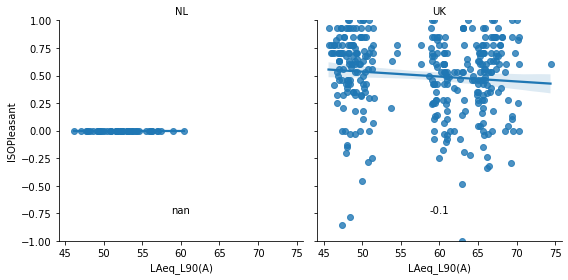

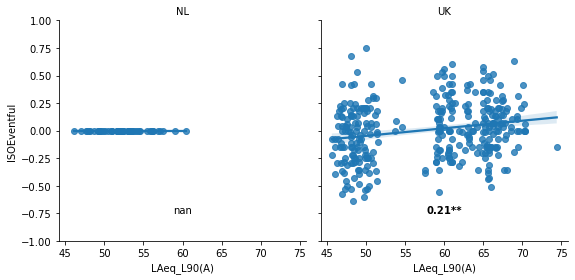

In [20]:
plotting.grouped_lmplot(data, 'LAeq_L90(A)', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'LAeq_L90(A)', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


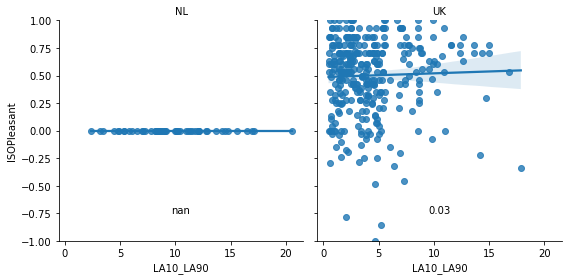

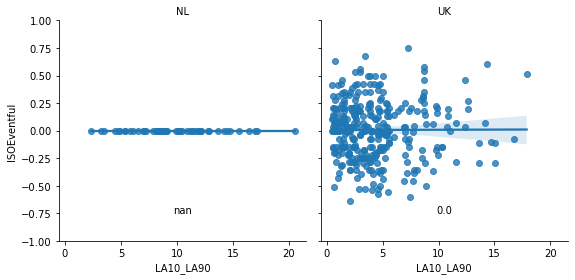

In [23]:
data['LA10_LA90'] = data['LAeq_L10(A)'] - data['LAeq_L90(A)']
plotting.grouped_lmplot(data, 'LA10_LA90', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'LA10_LA90', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})

## Relationship of psychological status and the pleasantness and eventfulness

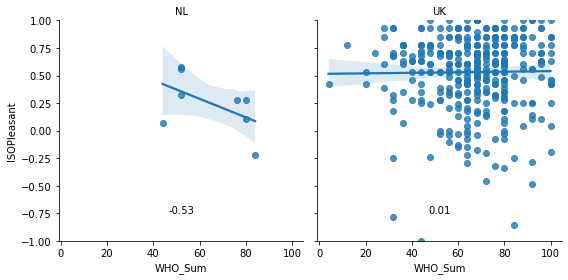

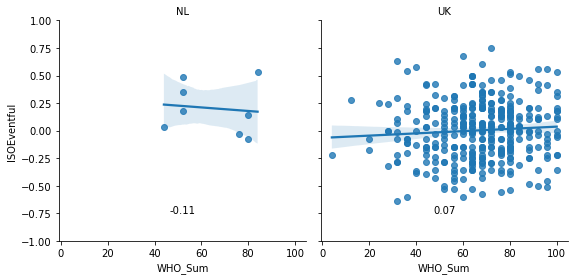

In [24]:
plotting.grouped_lmplot(data, 'WHO_Sum', 'ISOPleasant', groups='Country', col_wrap=2, facet_kws={'sharex': True})
plotting.grouped_lmplot(data, 'WHO_Sum', 'ISOEventful', groups='Country', col_wrap=2, facet_kws={'sharex': True})